# Loading the Train, Test, and Validation Datasets
First, we'll load your datasets using PyTorch's DataLoader. This allows for efficient loading and preprocessing of the data.
This code defines the transformations for the images, including resizing, converting to tensor, and normalization. It then loads the datasets from specified folders and creates DataLoaders for each dataset. These DataLoaders will be used for training and evaluating the model.

In [1]:
import os
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

NVIDIA GeForce RTX 3090
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [2]:
# Define the data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to a consistent size
    transforms.ToTensor(),          # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image data
])

# Set the paths for the datasets
base_folder = "../datasets/vision/Vision_data"
train_folder = os.path.join(base_folder, "train")
test_folder = os.path.join(base_folder, "test")
validation_folder = os.path.join(base_folder, "validation")

# Create datasets
train_dataset = ImageFolder(root=train_folder, transform=transform)
test_dataset = ImageFolder(root=test_folder, transform=transform)
validation_dataset = ImageFolder(root=validation_folder, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, num_workers=6)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, num_workers=6)
validation_loader = DataLoader(validation_dataset, batch_size=512, shuffle=False, num_workers=6)


# Visualizing a Subset of the Training Images
Next, we'll randomly select 12 images from the training set and display them in a 3x4 grid. The images will be saved to the specified output folder. This code extracts 12 images from the training DataLoader and uses `matplotlib` to plot them. The imshow function handles the un-normalization and display of the images.

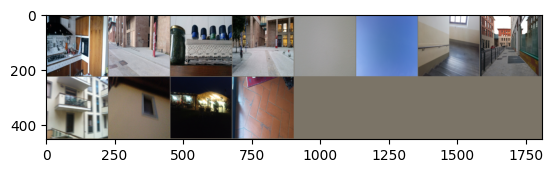

35


<Figure size 640x480 with 0 Axes>

In [3]:
import matplotlib.pyplot as plt
import torchvision
import numpy as np
import random

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs[:12])

imshow(out)

# Save the image
output_folder = "../output/"
os.makedirs(output_folder, exist_ok=True)
plt.savefig(os.path.join(output_folder, "random_train_images.jpg"))
print(len(train_dataset.classes))

# Training a ResNet-18 Model
Finally, we'll train a ResNet-18 model using the loaded datasets. This code assumes a GPU is available for training. This code sets up a pretrained ResNet-18 model, adapting its final layer to the number of classes in your dataset. It uses a GPU for training if available. The training loop includes backpropagation and optimization steps, and a learning rate scheduler is used to adjust the learning rate over time. The trained model is saved to the specified output folder.

## Basic Run

In [4]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import models
# from torch.optim.lr_scheduler import StepLR
# from tqdm import tqdm
# import pandas as pd
# import datetime
# import os
# import matplotlib.pyplot as plt

# # Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# # Load a pretrained ResNet-18 model and modify it for our number of classes
# model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
# num_classes = len(train_dataset.classes)
# model.fc = nn.Linear(model.fc.in_features, num_classes)
# model = model.to(device)

# # Define loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# # Learning rate scheduler
# scheduler = StepLR(optimizer, step_size=7, gamma=0.1)

# # Initialize an empty DataFrame to store epoch and loss data
# df = pd.DataFrame(columns=['Epoch', 'Training Loss'])
# df = df.astype({'Epoch': 'int32', 'Training Loss': 'float64'})


# # Training loop
# num_epochs = 40  # Adjust as needed
# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=False)
#     for inputs, labels in progress_bar:
#         inputs, labels = inputs.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#         progress_bar.set_postfix(loss=(running_loss/(progress_bar.n + 1)))

#     scheduler.step()
#     epoch_loss = running_loss / len(train_loader)

#     # Add epoch and loss to the DataFrame
#     new_row = pd.DataFrame({'Epoch': [epoch + 1], 'Training Loss': [epoch_loss]})
#     df = pd.concat([df, new_row], ignore_index=True)
#     # df = df.append({'Epoch': epoch + 1, 'Loss': epoch_loss}, ignore_index=True)

# # Save the trained model
# output_folder = "../output/"  # Adjust the output folder as needed
# os.makedirs(output_folder, exist_ok=True)
# torch.save(model.state_dict(), os.path.join(output_folder, 'resnet18_trained.pth'))

# # Save the DataFrame to a CSV file
# # timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
# csv_filename = f"training_data.csv"
# df.to_csv(os.path.join(output_folder, csv_filename), index=False)

In [5]:
# # Plotting the training loss
# plt.figure(figsize=(10, 6))
# plt.plot(df['Epoch'], df['Training Loss'], marker='o', linestyle='-')
# plt.title('Training Loss per Epoch')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.xticks(range(1, num_epochs + 1, 2))  # Set x-axis ticks to be every 2 epochs
# plt.grid(True, which='both', axis='both', linestyle='--')
# plt.savefig(os.path.join(output_folder, f"training_loss_plot.jpg"), dpi=300)  # Save the plot as a PNG file
# plt.show()

## TensorBoard Run with analytics

In [6]:
import os
import math
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import LambdaLR
from torch.utils.tensorboard import SummaryWriter
import pandas as pd
import datetime
import math
import matplotlib.pyplot as plt
from tqdm import tqdm

# Ensure the necessary folders and datasets are set up here
# Example:
# train_dataset = ImageFolder(...)
# train_loader = DataLoader(train_dataset, ...)
# validation_loader = DataLoader(...)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load and modify the pretrained ResNet model
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
num_classes = len(train_dataset.classes)  # Ensure train_dataset is defined
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def warmup_cosine_annealing(lr, warmup_epochs, total_epochs, warmup_start_lr=1e-5):
    def lr_lambda(epoch):
        if epoch < warmup_epochs:
            return (lr - warmup_start_lr) / warmup_epochs * epoch + warmup_start_lr / lr
        elif total_epochs > warmup_epochs:
            return 0.5 * (1 + torch.cos(torch.tensor(math.pi * (epoch - warmup_epochs) / (total_epochs - warmup_epochs))))
        else:
            return 1  # Return a constant value if total_epochs is not greater than warmup_epochs
    return lr_lambda

num_epochs = 20  # Make sure this is set correctly and is greater than warmup_epochs
scheduler = LambdaLR(optimizer, lr_lambda=warmup_cosine_annealing(0.001, 5, num_epochs))


# TensorBoard setup
writer = SummaryWriter('runs/resnet18_experiment')

# Initialize a DataFrame to store epoch, training loss, and validation accuracy
# Initialize a DataFrame to store epoch, training loss, validation accuracy, and test accuracy
df = pd.DataFrame(columns=['Epoch', 'Training Loss', 'Validation Accuracy', 'Test Accuracy', 'Epoch Duration'])
df = df.astype({'Epoch': 'int32', 'Training Loss': 'float64', 'Validation Accuracy': 'float64', 'Test Accuracy': 'float64', 'Epoch Duration': 'float64'})


# Initialize best validation accuracy
best_val_accuracy = 0

# Training loop with model checkpointing and TensorBoard logging
for epoch in range(num_epochs):
    start_time = time.time()  # Start time of the epoch
    model.train()
    total_train_loss = 0.0
    progress_bar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', leave=True)
    for inputs, labels in progress_bar:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    writer.add_scalar('Loss/train', avg_train_loss, epoch)

        # Test Phase
    model.eval()
    total_test = 0
    correct_test = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_accuracy = correct_test / total_test
    writer.add_scalar('Accuracy/test', test_accuracy, epoch)

    # Validation
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for inputs, labels in validation_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_accuracy = correct / total
    writer.add_scalar('Accuracy/val', val_accuracy, epoch)

    epoch_duration = time.time() - start_time  # Calculate the duration of the epoch
    
    # Add data to DataFrame
    # Instead of using append, create a DataFrame and concat
    new_row = pd.DataFrame({
        'Epoch': [epoch + 1], 
        'Training Loss': [avg_train_loss], 
        'Validation Accuracy': [val_accuracy],
        'Test Accuracy': [test_accuracy],
        'Epoch Duration': [epoch_duration]
    })
    df = pd.concat([df, new_row], ignore_index=True)

    # Checkpointing
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), os.path.join(output_folder, f'resnet18_epoch{epoch}.pth'))

    scheduler.step()

writer.close()

# Save the DataFrame to a CSV file with a timestamp
output_folder = "../output/"  # Ensure this folder exists
os.makedirs(output_folder, exist_ok=True)
timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
csv_filename = f"training_results_{timestamp}.csv"
df.to_csv(os.path.join(output_folder, csv_filename), index=False)

Epoch 20/20: 100%|██████████| 135/135 [06:57<00:00,  3.10s/it]


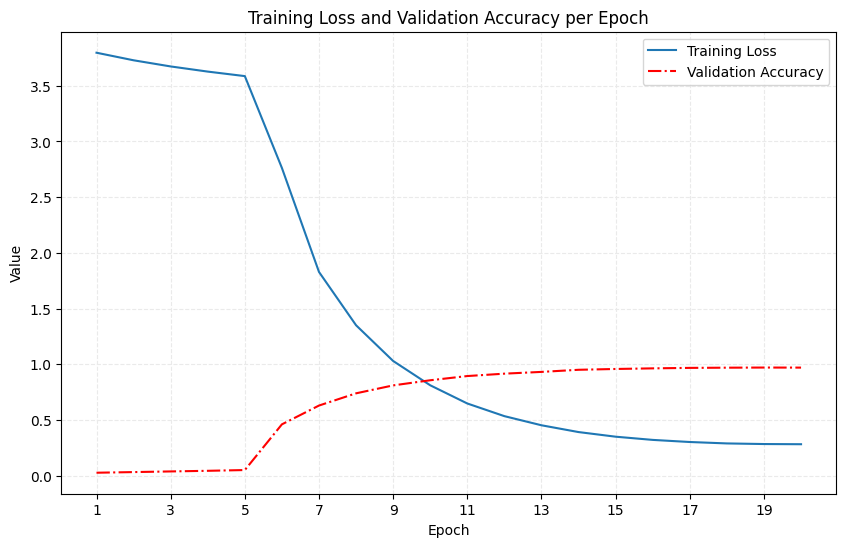

In [7]:
# Plotting the training loss and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Training Loss'], linestyle='-', label='Training Loss')
plt.plot(df['Epoch'], df['Test Accuracy'], linestyle='-.', color='green', label='Test Accuracy')
plt.plot(df['Epoch'], df['Validation Accuracy'], linestyle='-.', color='red', label='Validation Accuracy')
plt.title('Training Loss and Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.xticks(range(1, num_epochs + 1, 2))  # Set x-axis ticks to be every 2 epochs
plt.grid(True, which='both', axis='both', linestyle='--', color="#eaeaea")
plt.legend()
plt.savefig(os.path.join(output_folder, f"training_plot_{timestamp}.png"), dpi=300)  # Save the plot as a PNG file
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

def get_all_predictions(loader, model, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.view(-1).tolist())
            all_labels.extend(labels.view(-1).tolist())
    return all_preds, all_labels

# Get predictions and true labels for both datasets
train_preds, train_labels = get_all_predictions(train_loader, model, device)
val_preds, val_labels = get_all_predictions(validation_loader, model, device)

# Compute confusion matrices
train_cm = confusion_matrix(train_labels, train_preds)
val_cm = confusion_matrix(val_labels, val_preds)

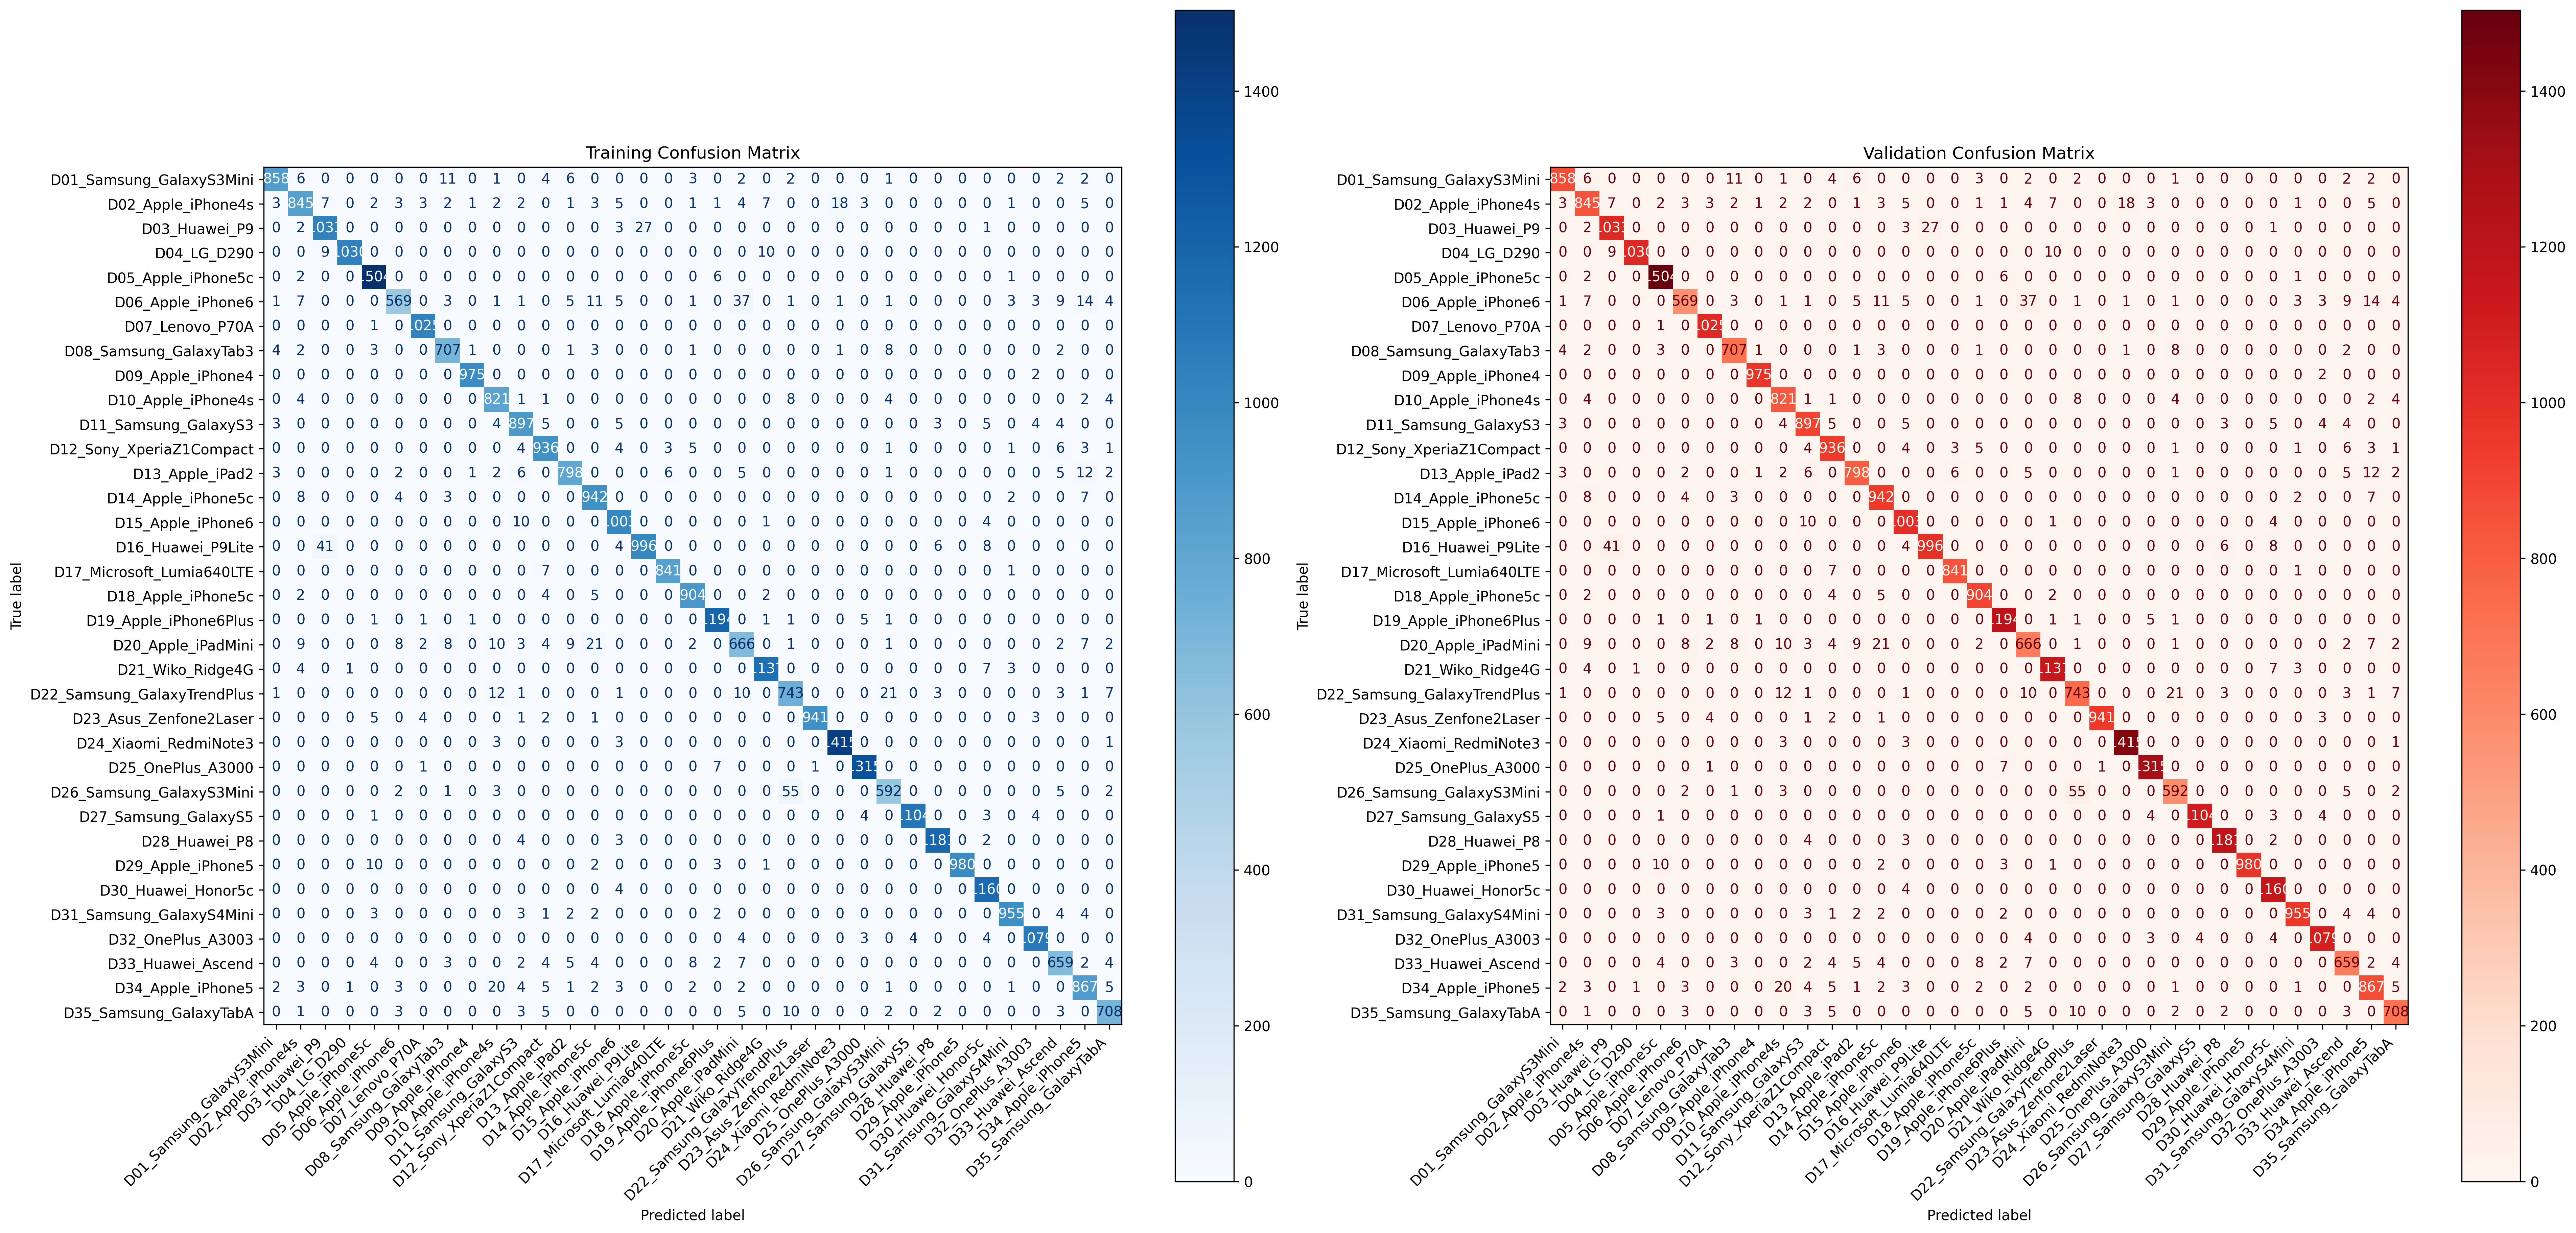

In [9]:
# Plot confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 15), dpi=300)

ConfusionMatrixDisplay(train_cm, display_labels=train_dataset.classes).plot(ax=axes[0], cmap=plt.cm.Blues)
axes[0].set_title('Training Confusion Matrix')
axes[0].set_xticklabels(rotation=45, labels=train_dataset.classes, ha= 'right')

ConfusionMatrixDisplay(val_cm, display_labels=validation_dataset.classes).plot(ax=axes[1], cmap=plt.cm.Reds)
axes[1].set_title('Validation Confusion Matrix')
axes[1].set_xticklabels(rotation=45, labels=validation_dataset.classes, ha='right')

plt.show()

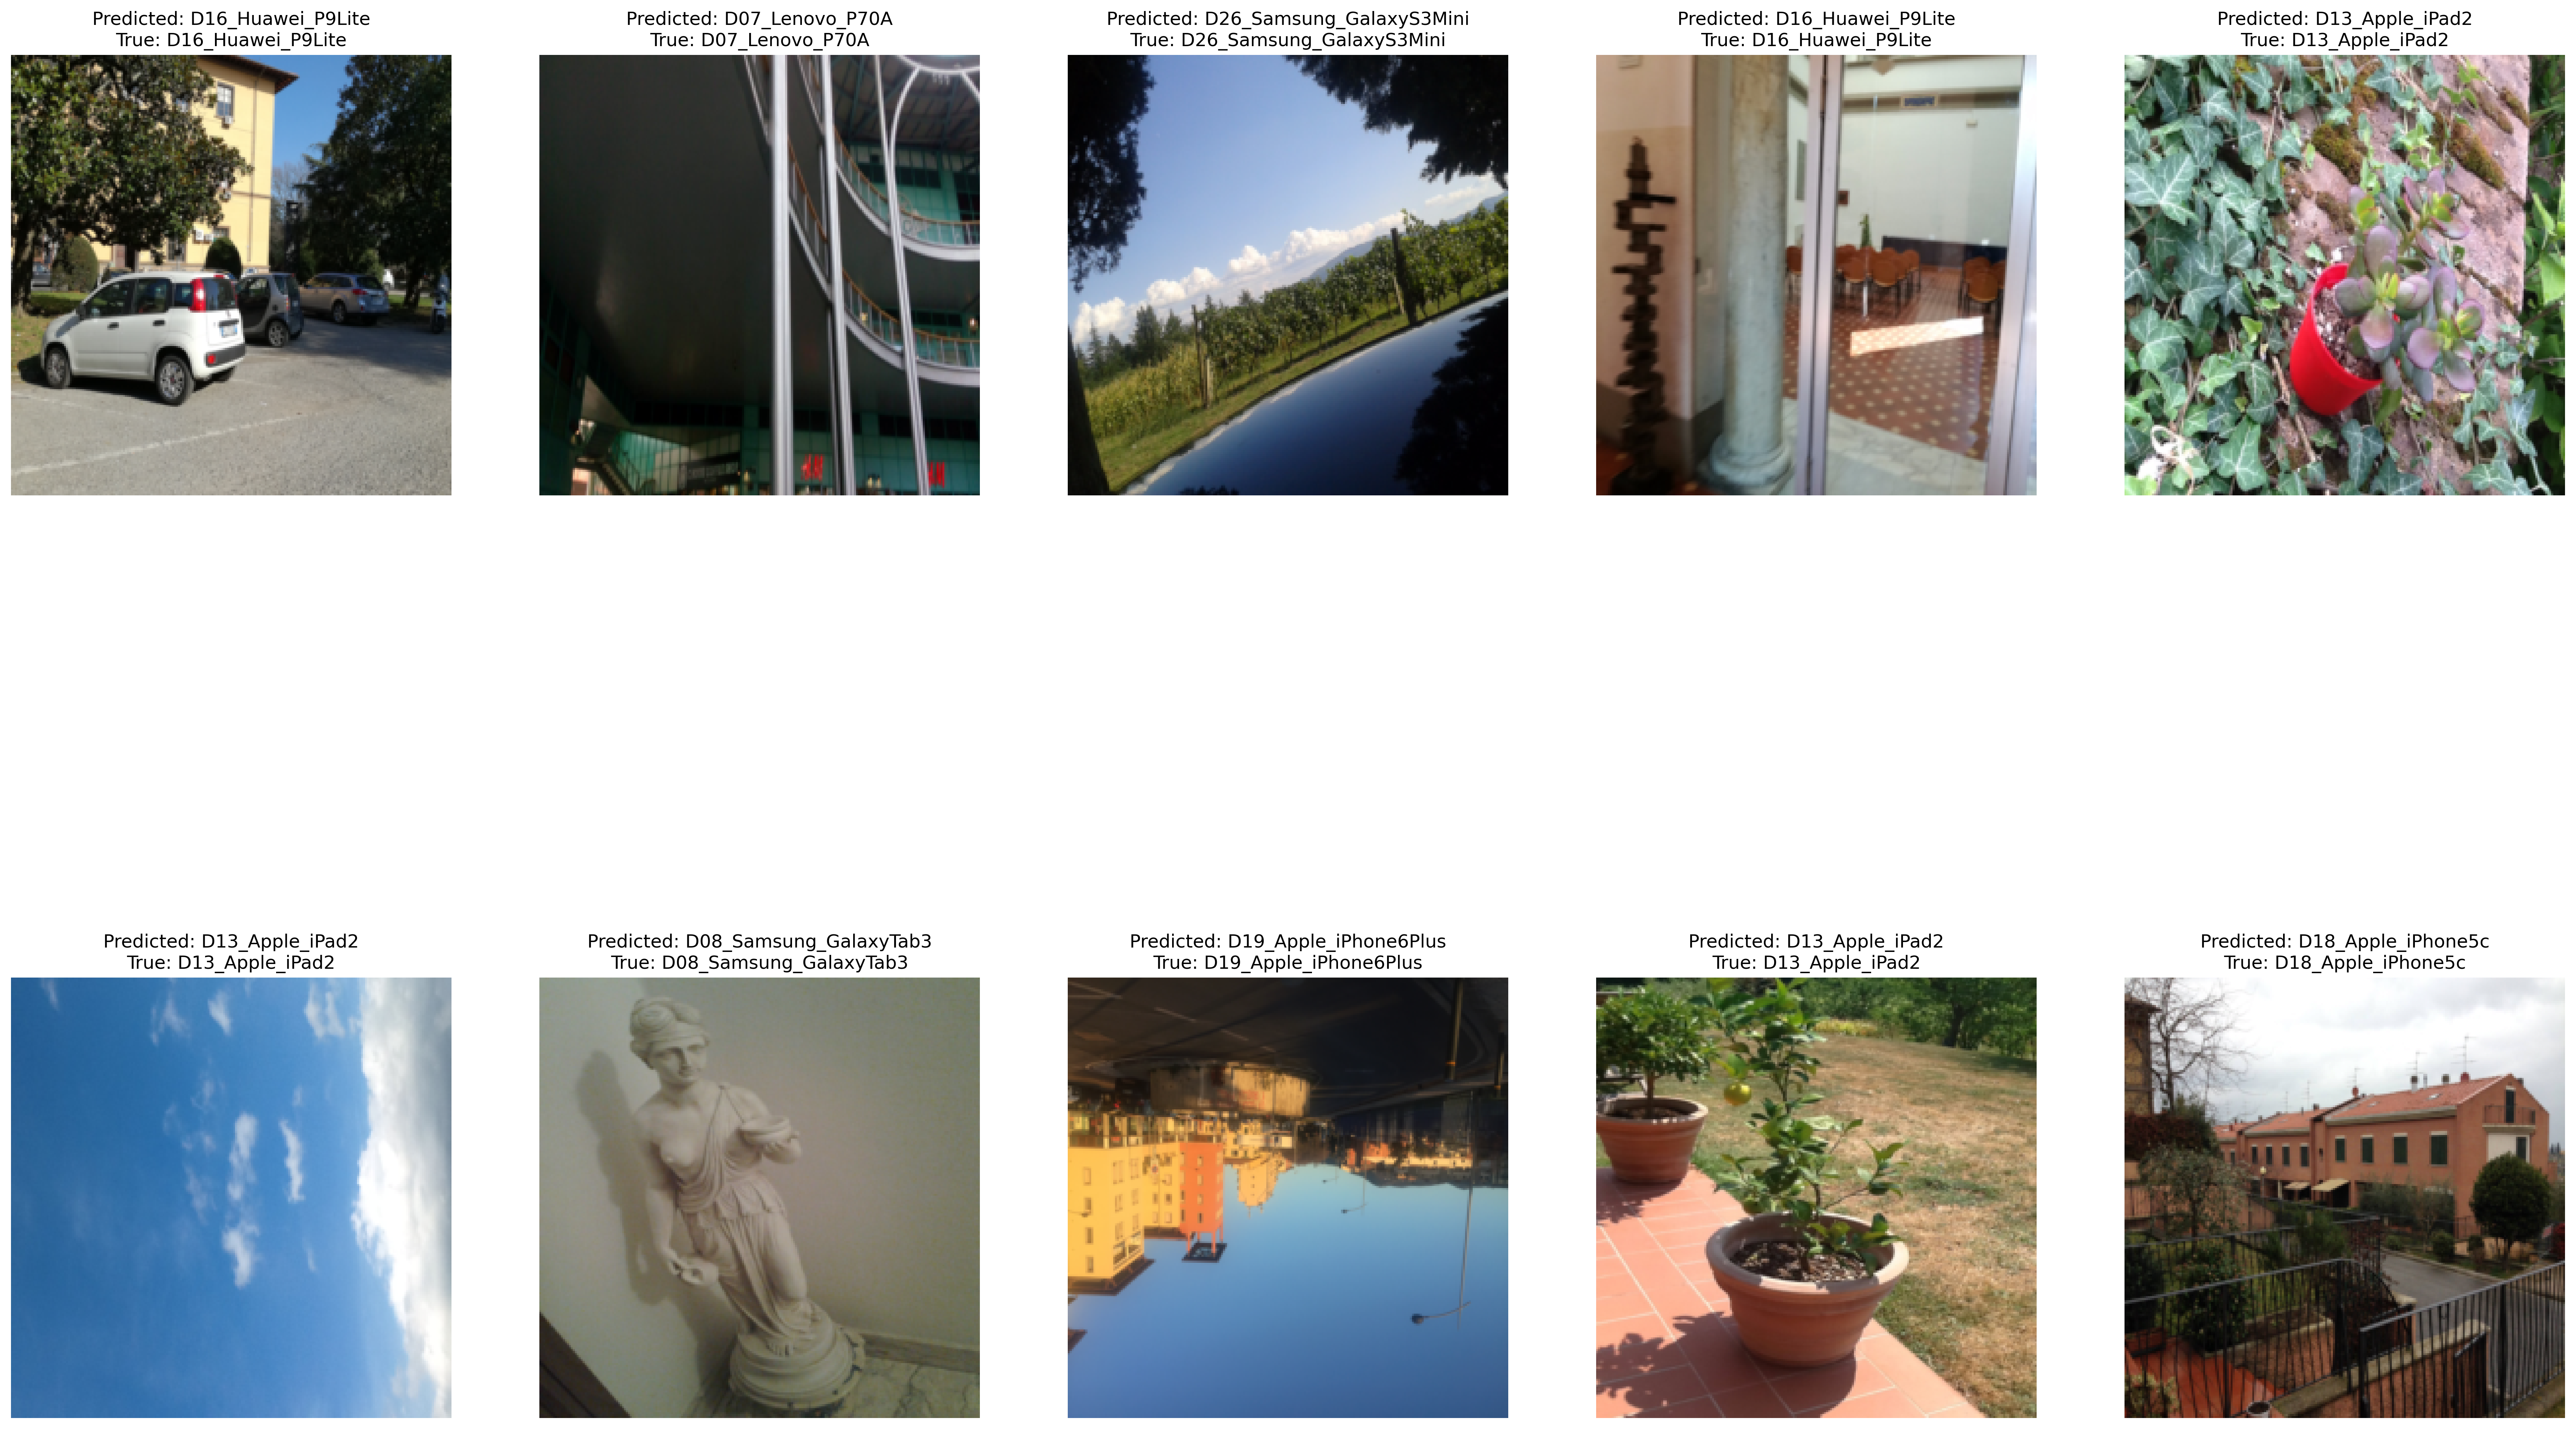

<Figure size 640x480 with 0 Axes>

In [15]:
import torch
import random
from torchvision.transforms.functional import to_pil_image
from PIL import Image
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Randomly select 10 images from the validation set
random_indices = random.sample(range(len(validation_dataset)), 10)
images, true_labels = zip(*[validation_dataset[i] for i in random_indices])

# Function to unnormalize and convert a tensor to a PIL image
def unnormalize_and_convert_to_pil(tensor):
    mean = torch.tensor([0.485, 0.456, 0.406]).view(-1, 1, 1).to(tensor.device)
    std = torch.tensor([0.229, 0.224, 0.225]).view(-1, 1, 1).to(tensor.device)
    tensor = tensor.clone().detach()  # Clone the tensor
    tensor = tensor.mul_(std).add_(mean)  # Unnormalize
    tensor = tensor.clamp(0, 1)  # Clamp to the range [0, 1]
    return to_pil_image(tensor)

# Predict and display
plt.figure(figsize=(30, 20), dpi=300)
for i, (image, true_label) in enumerate(zip(images, true_labels)):
    # Predict
    image_tensor = image.unsqueeze(0).to(device)
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        predicted_label = validation_dataset.classes[predicted[0]]

    # Convert image for display
    image_pil = unnormalize_and_convert_to_pil(image)

    # Display
    plt.subplot(2, 5, i + 1)
    plt.imshow(image_pil)
    plt.title(f'Predicted: {predicted_label}\nTrue: {validation_dataset.classes[true_label]}')
    plt.axis('off')
plt.show()
plt.savefig('../output/sample_predictions_ResNet18.jpg', dpi=300, bbox_inches='tight', pad_inches=0)